## Download Libraries

In [1]:
!pip install numpy pandas matplotlib scikit-learn opencv-python tensorflow keras


##  Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


## load_data: Load and preprocess labeled images from class-based folders into NumPy arrays.


In [3]:
def load_data(data_dir, img_size=(64, 64)):
    X, y = [], []
    class_names = sorted([
        folder for folder in os.listdir(data_dir)
        if os.path.isdir(os.path.join(data_dir, folder))
    ])
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(data_dir, class_name)
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(label)
            except:
                print(f"❌ Error loading image: {img_path}")
    return np.array(X)/255.0, np.array(y), class_names


## Load and summarize image dataset from class-based folder structure.


In [4]:
data_path = r"C:\Users\msski\Downloads\ProjectRice\Dataset_50images"
X, y, class_names = load_data(data_path)
print("✅ Dataset loaded.")
print("Total samples:", len(X))
print("Classes:", class_names)


✅ Dataset loaded.
Total samples: 853
Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


## Visualize image class distribution from directory-structured dataset.


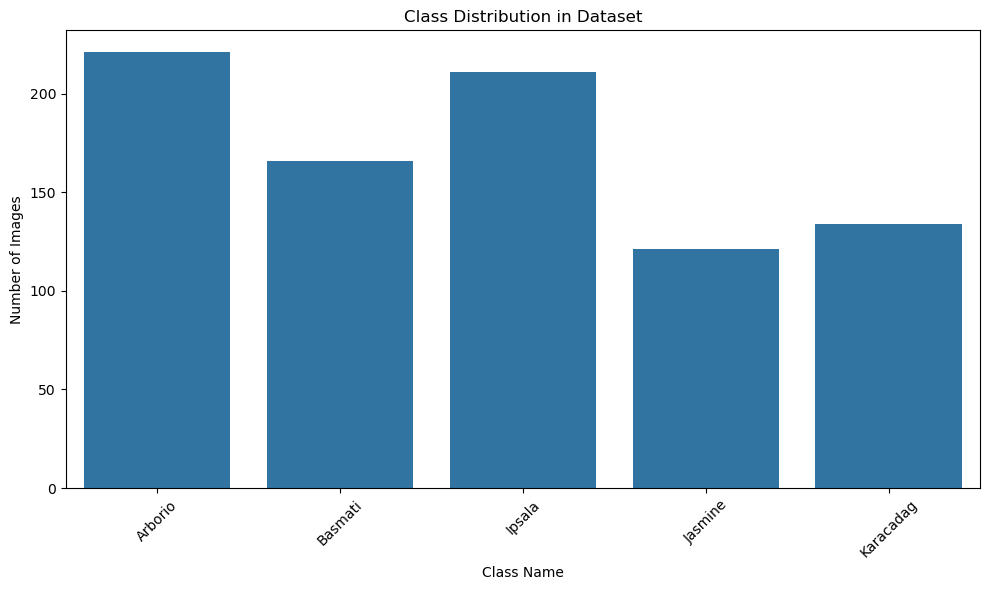

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to your dataset folder
dataset_dir = r"C:\Users\msski\Downloads\ProjectRice\Dataset_50images"

# List to store data
data = []

# Walk through each subfolder (class name)
for class_name in os.listdir(dataset_dir):
    class_folder = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_folder):
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            data.append({"filepath": img_path, "label": class_name})

# Create DataFrame
df = pd.DataFrame(data)

# ✅ Plot class distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['label'])
ax.set_xlabel("Class Name")
ax.set_ylabel("Number of Images")
ax.set_title("Class Distribution in Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Display a grid of sample images from each class in the dataset.


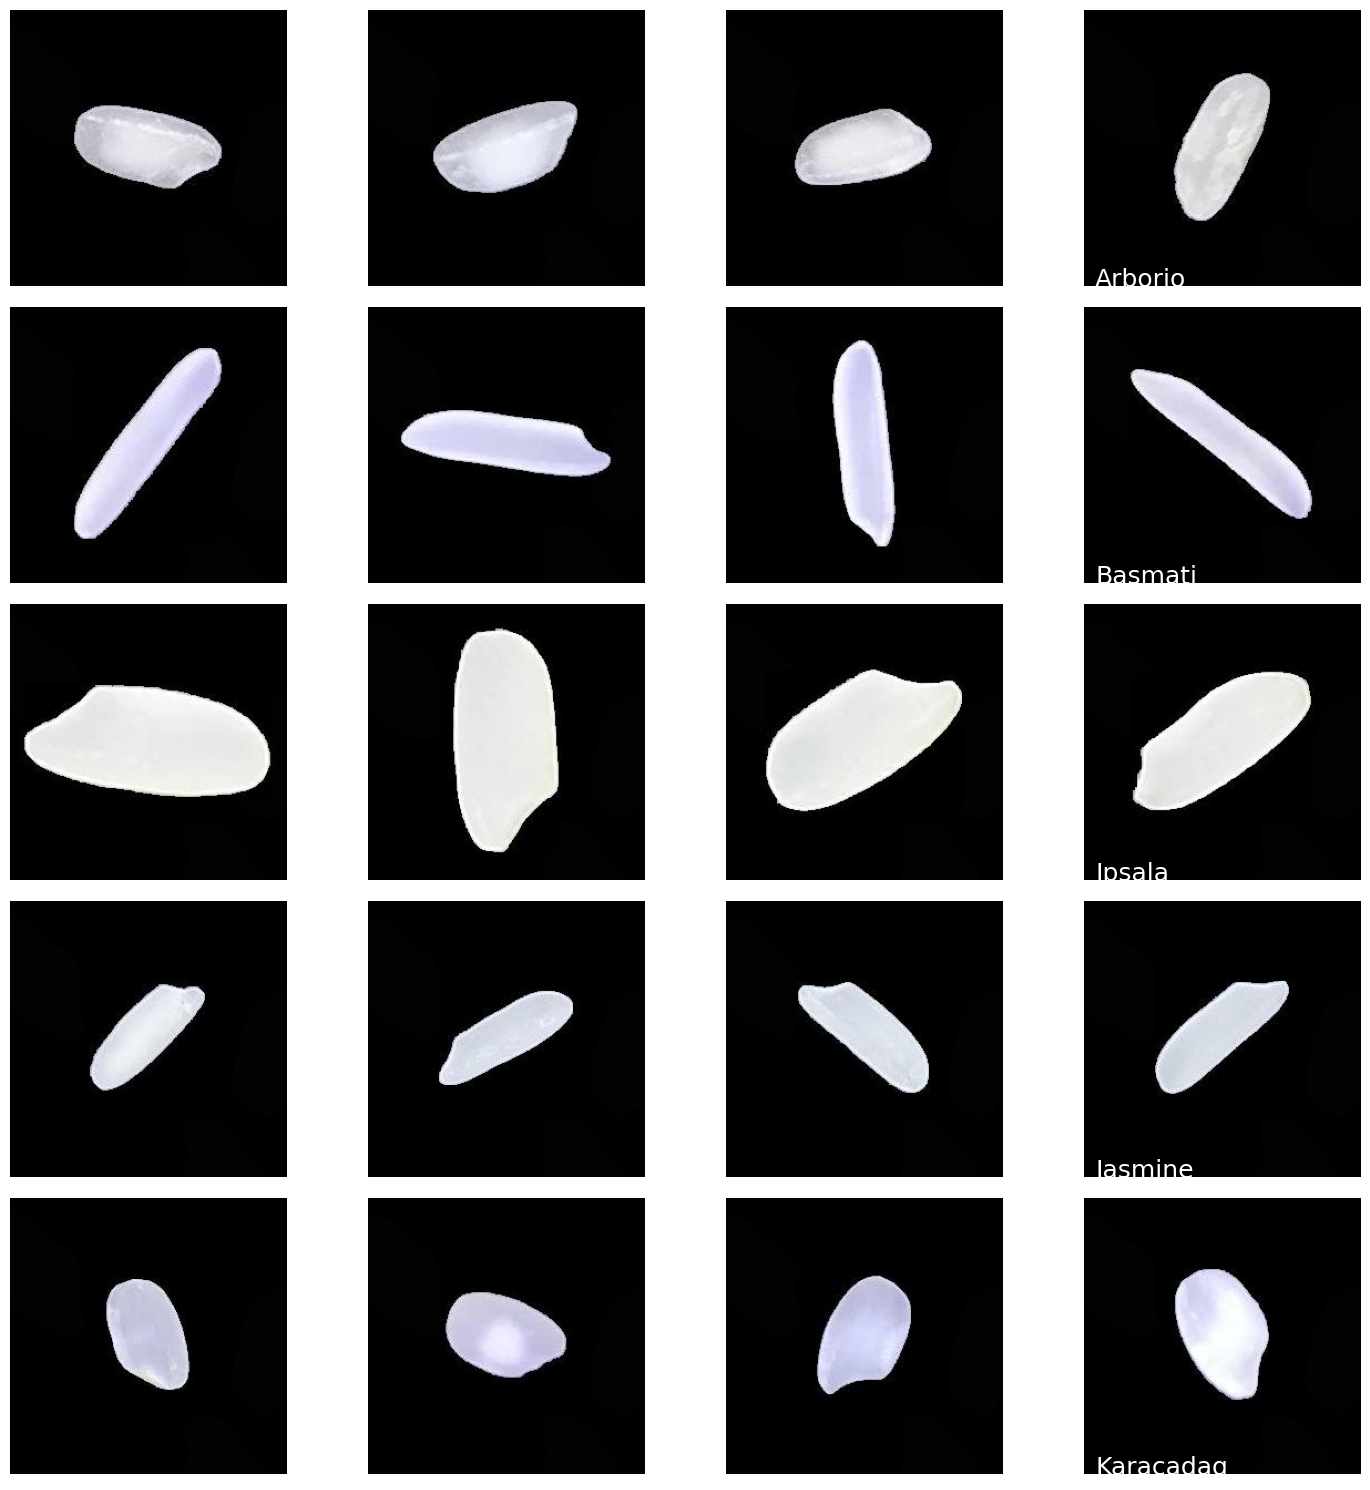

In [6]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)  # Adjust based on your dataset size

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['filepath'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add category name below the last image in the row
    ax.text(10, 250, category, fontsize=18, color='white')

plt.tight_layout()
plt.show()


## Split dataset into training and testing sets with one-hot encoded labels.


In [7]:
# 🎓 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


## Build a CNN model for image classification using Keras Sequential API.


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])


c:\Users\msski\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the CNN model and display its architecture summary.


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,797 (6.20 MB)

 Trainable params: 1,625,797 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Train the CNN model on the training set and validate on the test set.


In [10]:
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5184 - loss: 1.1201 - val_accuracy: 0.8772 - val_loss: 0.2926
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9012 - loss: 0.2627 - val_accuracy: 0.9240 - val_loss: 0.2069
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9534 - loss: 0.1110 - val_accuracy: 0.9357 - val_loss: 0.1548
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9730 - loss: 0.0969 - val_accuracy: 0.9532 - val_loss: 0.1902
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9728 - loss: 0.0813 - val_accuracy: 0.9591 - val_loss: 0.1272
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9793 - loss: 0.0496 - val_accuracy: 0.9649 - val_loss: 0.2036
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9818 - loss: 0.0507 - val_accuracy: 0.9474 - val_loss: 0.1521
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9923 - loss: 0.0345 - val_accuracy: 0.9532 - v

## Evaluate the trained model on the test set and display accuracy.


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\n🎯 Test Accuracy: {test_acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8873 - loss: 0.3827 

🎯 Test Accuracy: 0.91


## Save the trained CNN model to an H5 file for future use.


In [12]:
model.save("rice_type_classifier.h5")
print("✅ Model saved as 'rice_type_classifier.h5'")


✅ Model saved as 'rice_type_classifier.h5'


## Visualize training performance and define a function to predict rice type from an image.


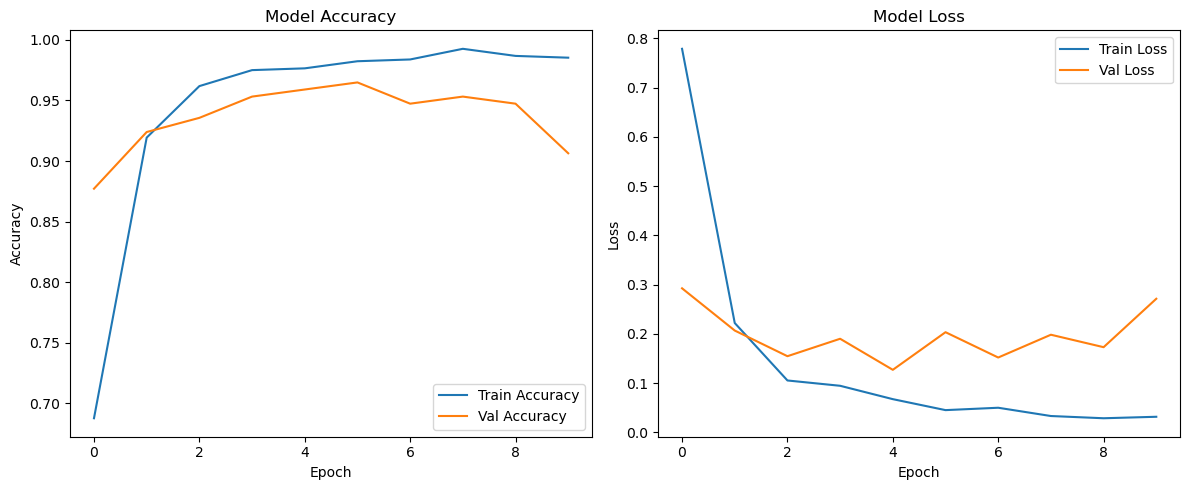

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 🔍 Predict on a sample image
def predict_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    pred = model.predict(np.expand_dims(img, axis=0))
    class_index = np.argmax(pred)
    print("🔎 Predicted Class:", class_names[class_index])
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {class_names[class_index]}")
    plt.axis('off')
    plt.show()


## Run the trained model to predict the class of a sample rice image.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
🔎 Predicted Class: Basmati


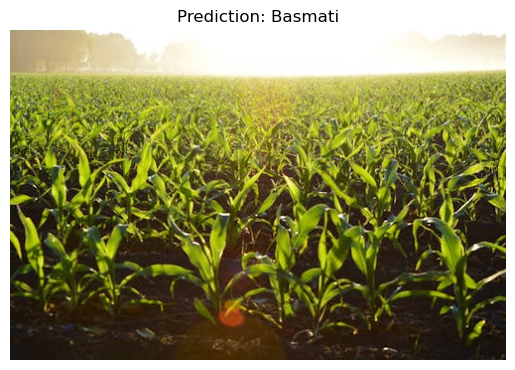

In [14]:
# 🧪 Predict on a sample image
predict_image(r"C:\Users\msski\Downloads\ProjectRice\samplecrop (1).jpeg")